In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

### Read Data

In [2]:
file_name = 'Heineken - Data Science Use Case.csv'
df_raw_data = pd.read_csv("C:\\Users\\caval\\Desktop\\DesafioHeineken\\" + file_name)
df_raw_data.sample(5)

,Unnamed: 0,Job ID,Date/Time,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,...,pH,Extract,Color,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,Product
199,199,2449970601,11/23/2020 22:01,21.929961,12556.75271,8296.850000,66.933041,6772.500,105.202896,7030.50,...,5.743791,12.181288,12.958560,507.400,826.675,14.494583,908.375,6.1275,6.02,AMST
27,27,2449962144,10/29/2020 16:03,64.285052,13986.18042,6068.525647,66.967902,6748.850,105.408559,6546.75,...,5.598853,15.533384,14.302310,3094.925,739.600,14.494583,908.375,6.1275,6.02,AMST
185,185,2449970007,11/22/2020 3:01,NaN,0.00000,8313.931897,67.107329,6704.775,105.269124,6568.25,...,5.671078,15.691440,13.413449,3166.950,734.225,14.494583,908.375,6.1275,6.02,AMST
122,122,2449967376,11/14/2020 7:02,64.177579,14055.78667,6070.202710,67.208414,6597.275,105.168039,6686.50,...,5.816015,15.428160,44.990000,3144.375,739.600,14.494583,908.375,6.0200,6.02,AMST
196,196,2449970477,11/23/2020 11:44,20.209987,12352.92158,8389.450647,77.233385,11671.275,105.098326,6815.50,...,5.642286,14.229196,13.444820,1239.475,761.100,14.494583,908.375,6.1275,6.02,AMST


### data train and data test, filter product AMST

In [3]:
df_train = df_raw_data[(~df_raw_data['Color'].isnull()) & (df_raw_data['Product']=='AMST')].copy()
df_test = df_raw_data[(df_raw_data['Color'].isnull()) & (df_raw_data['Product']=='AMST')].copy()
df_train.shape, df_test.shape

((150, 22), (30, 22))

### explore data for each variable

In [4]:
all_features = ['Roast amount (kg)','1st malt amount (kg)', '2nd malt amount (kg)', 'MT - Temperature','MT - Time', 'WK - Temperature', 'WK - Steam', 'WK - Time','Total cold wort', 'pH', 'Extract', 'Color', 'WOC - Time',
       'WHP Transfer - Time', 'WHP Rest - Time', 'Roast color','1st malt color', '2nd malt color']

for variable_name in all_features:
    print('\n-----------')
    print('variable: ', variable_name)
    print('nrows:', df_train[variable_name].count())
    print('nrows with nan:', df_train[variable_name].isna().sum())
    print('variance:', df_train[variable_name].std().round(2))
    print(['Q(' + str(round(x,2)) + '): ' + str(df_train[variable_name].quantile(x).round(2)) for x in np.arange(0,1.01,0.05)])




-----------
variable:  Roast amount (kg)
nrows: 147
nrows with nan: 3
variance: 18.1
['Q(0.0): 17.42', 'Q(0.05): 21.13', 'Q(0.1): 23.07', 'Q(0.15): 23.64', 'Q(0.2): 24.51', 'Q(0.25): 24.72', 'Q(0.3): 25.67', 'Q(0.35): 26.17', 'Q(0.4): 27.63', 'Q(0.45): 27.74', 'Q(0.5): 28.17', 'Q(0.55): 30.35', 'Q(0.6): 50.14', 'Q(0.65): 53.54', 'Q(0.7): 53.96', 'Q(0.75): 64.18', 'Q(0.8): 64.18', 'Q(0.85): 64.28', 'Q(0.9): 64.5', 'Q(0.95): 64.61', 'Q(1.0): 88.04']

-----------
variable:  1st malt amount (kg)
nrows: 150
nrows with nan: 0
variance: 1369.92
['Q(0.0): 0.0', 'Q(0.05): 12564.86', 'Q(0.1): 12574.26', 'Q(0.15): 12582.96', 'Q(0.2): 12592.93', 'Q(0.25): 13944.86', 'Q(0.3): 14003.41', 'Q(0.35): 14015.31', 'Q(0.4): 14021.88', 'Q(0.45): 14029.57', 'Q(0.5): 14041.3', 'Q(0.55): 14051.15', 'Q(0.6): 14063.22', 'Q(0.65): 14069.75', 'Q(0.7): 14081.5', 'Q(0.75): 14087.3', 'Q(0.8): 14090.98', 'Q(0.85): 14098.38', 'Q(0.9): 14117.85', 'Q(0.95): 14176.67', 'Q(1.0): 16092.75']

-----------
variable:  2nd malt

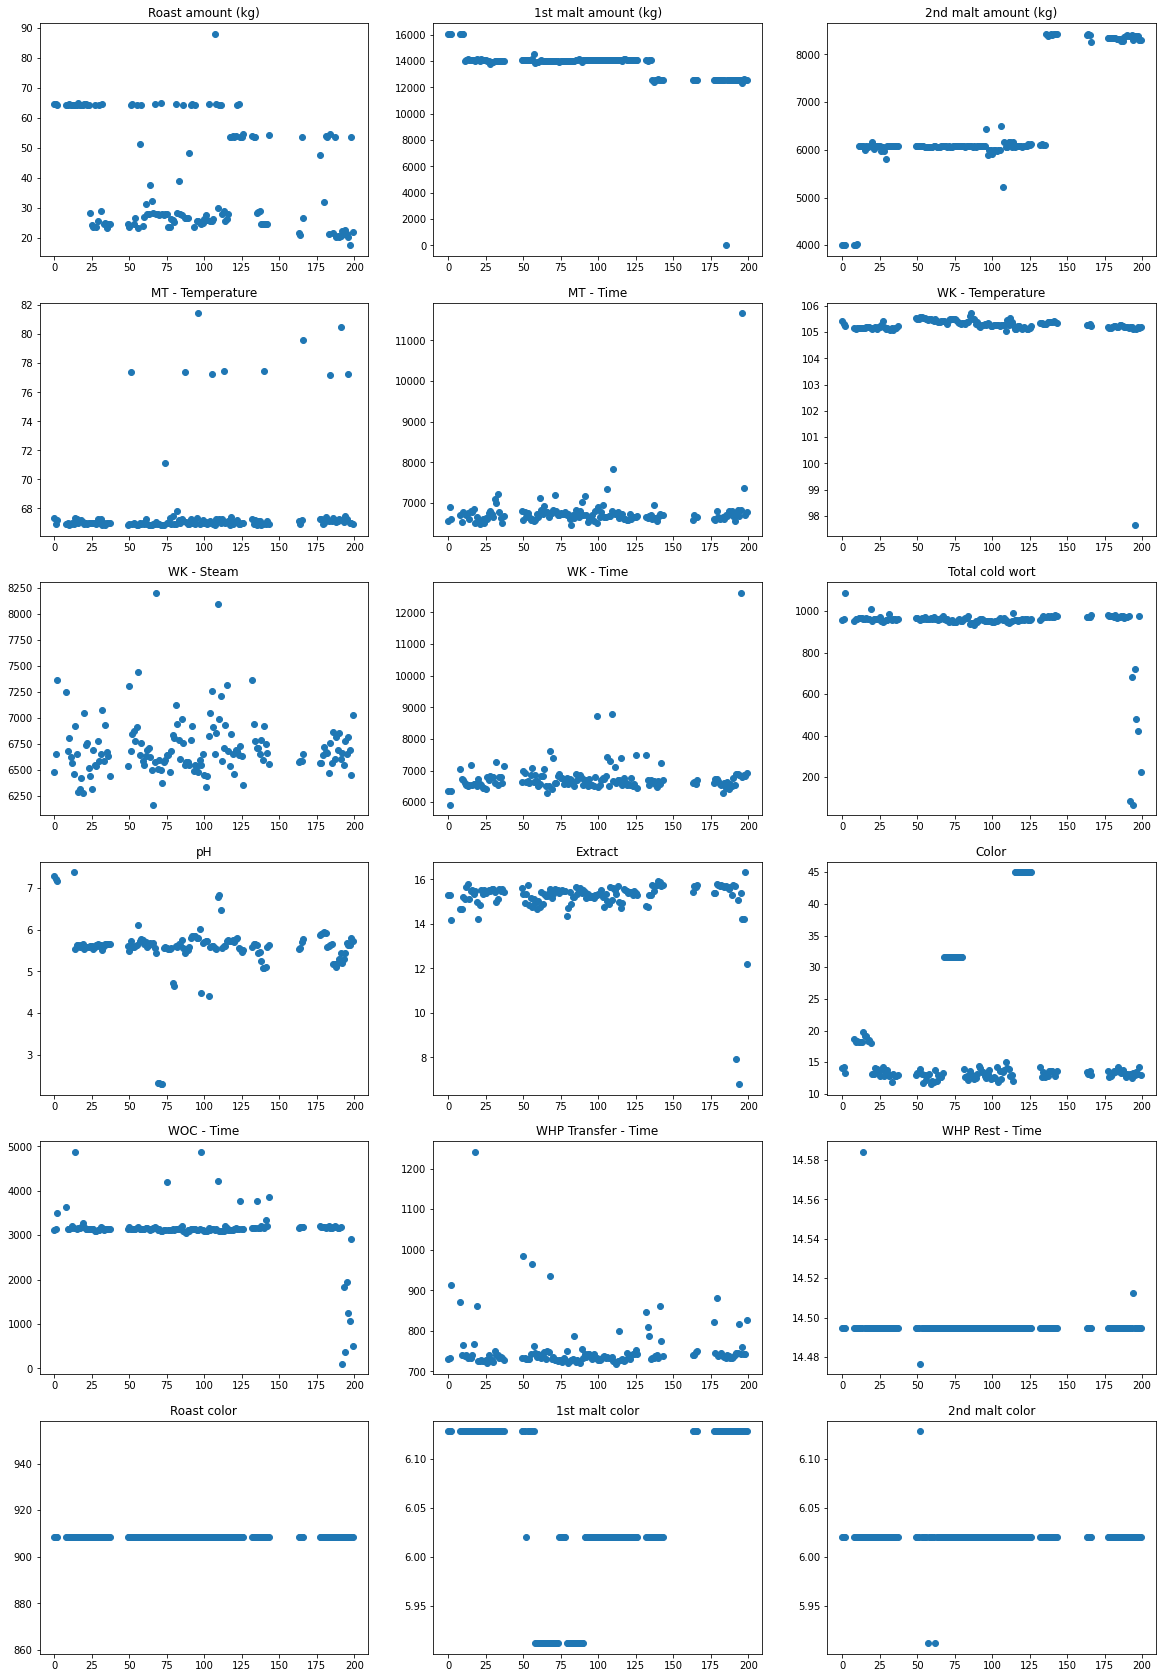

In [5]:
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(all_features)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 30))
i,j=0,0
for variable_name in all_features:
    axs[i][j].scatter(df_train[variable_name].index, df_train[variable_name], label = variable_name)
    axs[i][j].set_title(variable_name)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0

plt.show()

### Keypoint of data

- **Roast amount (kg)**: Variable with 3 nan values, high variance, high range (min=17, max=88), observed in plot there are 2 range of data (20-30, 60-70)
- **1st malt amount (kg)**: There are some data with zero values, although that range of data is between 1200kg a 1600kg 
- **2nd malt amount (kg)**: In plot, observed in plot there are 2 range of data (aprox 4000kg, aprox 8000kg)
- **MT - Temperature** : No comment of data
- **MT - Time** : There is 1 possible outlier ( >11600)
- **WK - Temperature** : No comment of data
- **WK - Steam** : No comment of data
- **WK - Time** : There is 1 possible outlier ( > 12600) 
- **Total cold wort** : Warning for value less then Q(0.05) 
- **pH** : No comment of data
- **extract** : Warning for value less then Q(0.05) 
- **Color** : Warning for value more then Q(0.85) 
- **WOC - Time** : Warning for value less then Q(0.05) 
- **WHP Transfer - Time** : No comment of data
- **WHP Rest - Time** : No comment of data
- **Roast color** : Variance equal zero  
- **1st malt color** :  No comment of data
- **2nd malt color** :  No comment of data

In [ ]:
df_train.columns

### Raw Information about the data

In [ ]:
df_raw_data.info()